In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import time
import sqlite3
import matplotlib.pyplot as plt

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='sohamp', api_key='uOn9aMHPaObEizELzFTk')
import plotly.plotly as py
import plotly.graph_objs as go

In [69]:
# Map for np array
def f(x):
#     return time.strftime('%H:%M:%S', time.localtime(int(x)))
    return x%(24*60*60)

In [4]:
def epoch_timestring(epoch_time):
    return time.strftime('%H:%M:%S', time.localtime(int(epoch_time))) #%d%B%YT%H:%M:%S

def date_epoch(date_string):
    utc_time = dt.strptime(date_string, "%Y-%m-%d")
    epoch_start_time = utc_time.timestamp()
    return epoch_start_time + 900, epoch_start_time + 86400

In [23]:
# def downsample(data, factor):
#     np_data = np.asarray(data)
#     np_sliced = np_data[::factor]

#     return np_sliced

In [6]:
conn = sqlite3.connect('/home/sohamp/project_course_sem6/git/analysis/occupancy_data.db')
cursor = conn.cursor()

In [7]:
def get_data(date_string):
    start_epoch, end_epoch = date_epoch(date_string)
    cursor.execute(
                'SELECT timeEpoch, area, building, floor, ap, count FROM occupancy_ap WHERE timeEpoch>{} AND timeEpoch<{}'
                            .format(start_epoch, end_epoch))
    np_ = np.asarray(cursor.fetchall())
    return np_

In [ ]:
get_data('2019-03-30')

In [ ]:
# for dd in range(10,32):
#     d_string = '2019-03-{}'.format(dd)
#     try:
#         print(d_string,get_data(d_string))
#     except Exception as e:
#         print(e, d_string)

In [10]:
date_avail = [26,27,31]

In [11]:
np_26 = get_data('2019-03-26')
np_27 = get_data('2019-03-27')
np_31 = get_data('2019-03-31')
np_1 = get_data('2019-04-02')

In [12]:
np_d = np_1

np.unique(np_d[:,1], return_counts=True)

np_d[np_d[:,1]=='SH']

np.unique(np_d[(np_d[:,1]=='DIN')&(np_d[:,2]=='FF')][:,4], return_counts=True)
# np_d[(np_d[:,1]=='DIN')&(np_d[:,2]=='SF')]#[:,3]

np_d[np_d[:,1]=='DIN']

In [21]:
np_d = get_data('2019-04-07')
np_d = np_d[np_d[:,1]=='SH']
np_d

array([['1554576360.0', 'SH', 'A', 'FF', '203', '6'],
       ['1554576360.0', 'SH', 'A', 'FF', '207', '13'],
       ['1554576360.0', 'SH', 'A', 'FF', '213', '4'],
       ...,
       ['1554661680.0', 'SH', 'F', 'TF', '469', '1'],
       ['1554661680.0', 'SH', 'F', 'TF', '474', '3'],
       ['1554661680.0', 'SH', 'F', 'TF', '480', '7']], dtype='<U32')

In [22]:
np_d_t = downsample(np_d,5)
np_d_t

array([['1554576360.0', 'SH', 'A', 'FF', '203', '6'],
       ['1554576360.0', 'SH', 'A', 'FF', '235', '3'],
       ['1554576360.0', 'SH', 'A', 'FF', '267', '3'],
       ...,
       ['1554661680.0', 'SH', 'F', 'SF', '374', '3'],
       ['1554661680.0', 'SH', 'F', 'TF', '440', '7'],
       ['1554661680.0', 'SH', 'F', 'TF', '469', '1']], dtype='<U32')

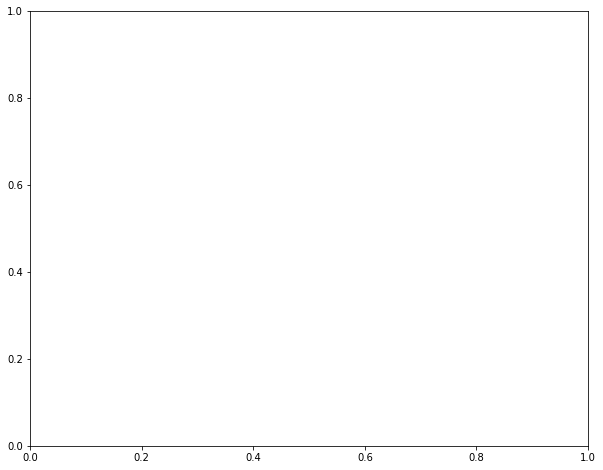

In [121]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
def occ_analyse(ddstr='2019-04-02'):
    np_d = get_data(ddstr)
    c = []
    np_d = np_d[np_d[:,2]=='D']
    time_np = downsample(np.unique(np_d[:,0]),5)
    
    for ep in time_np:
        c.append(np.asarray([float(ep), np_d[np_d[:,0]==ep][:,5].astype('int').sum()]))

    t = np.asarray(c)
    np_t = np.array([(f(te[0]),te[1]) for te in t[:]])
    
#     plt.clf()
#     ax.plot(np_t, t[:,1], label=ddstr)
#     ax.set_title(ddstr)
#     ax.legend()
#     plt.show()
    return(np_t)
#     plt.savefig('./occupancyPlots/SH_'+ddstr)

In [ ]:
dict_date_occ ={}
for d in range(1,8):
    dict_date_occ[d]=occ_analyse('2019-04-0{}'.format(d))

In [ ]:
time_list = []
for i in range(0, 24*60*60+1, 15*60):
    time_list.append(i)

In [ ]:
def froundoff(x):
    return x - x%(10*60)

In [116]:
for i in range(1,8):
    dict_date_occ[i] = dict_date_occ[i][dict_date_occ[i][:,0].argsort()]
    dict_date_occ[i] = np.array([(froundoff(te[0]),te[1]) for te in dict_date_occ[i][:]])
#     dict_date_occ[i] = np.array([(epoch_timestring(froundoff(te[0])),te[1]) for te in dict_date_occ[i][:]])

In [117]:
trace1 = go.Scatter(
    x = dict_date_occ[1][:,0],
    y = dict_date_occ[1][:,1],
    mode = 'lines+markers',
    name = '1 April'
)

trace2 = go.Scatter(
    x = dict_date_occ[2][:,0],
    y = dict_date_occ[2][:,1],
    mode = 'lines+markers',
    name = '2 April'
)
trace3 = go.Scatter(
    x = dict_date_occ[3][:,0],
    y = dict_date_occ[3][:,1],
    mode = 'lines+markers',
    name = '3 April'
)
trace4 = go.Scatter(
    x = dict_date_occ[4][:,0],
    y = dict_date_occ[4][:,1],
    mode = 'lines+markers',
    name = '4 April'
)
trace5 = go.Scatter(
    x = dict_date_occ[5][:,0],
    y = dict_date_occ[5][:,1],
    mode = 'lines+markers',
    name = '5 April'
)
trace6 = go.Scatter(
    x = dict_date_occ[6][:,0],
    y = dict_date_occ[6][:,1],
    mode = 'lines+markers',
    name = '6 April'
)
trace7 = go.Scatter(
    x = dict_date_occ[7][:,0],
    y = dict_date_occ[7][:,1],
    mode = 'lines+markers',
    name = '7 April'
)

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
py.iplot(data, filename='downsampled_5-occupancy in first week of April-Student Housing-roundedoff')